# Final capstone proposal - You are what you (tw)e(e)at

Nadine Ruecker <br>
March 2019
## Introduction

Overweight and obesity are complex health issues. They are affected by genetics, behavior and society. Eating patterns, exercise moral and even use of medication, seem to be voluntary choices. Nevertheless, studies have shown that these choices are not entirely freely made, but are impacted by the social environment, especially in regards to eating and exercise habits, education and the reactions to advertisement and marketing strategies. Obesity causes an enormous financial burden on the health care system, as it is associated with many other diseases like diabetes, diseases of the coronary system (heart disease and hypertension), mental illness, osteoarthritis and even some forms of cancer. Furthermore, the overall productivity is impacted by an increased rate of absenteeism (being absent) and presenteeism (being present but unproductive) at work, and earlier onsets of disabilities(https://www.cdc.gov/obesity/adult/causes.html). In 2016, 64.8% of adults in the US were reported to be overweight.<br>
In this project, I would like to explore if signs of healthy and unhealthy population behavior can be observed in twitter data. As you can see below in the case study, there is a clear correlation between the ratio of unhealthy/healthy tweets and the health outcomes. During my final capstone, I would like to explore the following two questions: <br>
1. Can the number of tweets in different categories predict health outcomes? <br>
2. Is the language between tweets mentioning healthy behavior different then tweets mentioning unhealthy behavior?

## Hypothesis
How many people are having a burger? How often do they go to a healthy restaurant? Who is sitting on the couch watching TV and who is exercising? <br>
Twitter generates an enormous amount of behavioral data in form of tweets, retweets, followers and likes. But can this data be representative for the population? My hypothesis is that tweet content reflects the eating and exercise behavior of the average population per State. I would like to predict how healthy the population of a certain US State is, without using data generated by health institutions (hospitals, insurances, central data collections), but rather using tweets. 

## Data
As historical tweets are only available with a paid account, I scraped only 2019 data of the past 7days and correlated it with the most up to date health indicators (obesity rates, hospital stays, diabetes death rate etc.) I scrapped an initial 150.000 tweets, by searching for unhealthy and healthy restaurants and activities mentioned in the tweets (a more detailed list can be seen below). I am planning, that once this proposal is approved, I will collect the tweet data corresponding to the health also reflecting food sources (veggies, fruits, high fat low fiber food.

### Locating tweets
The first task is to select only US based tweets. Most users have disabled the automatic geo-location label when posting a tweet; however, the majority of users has indicated a place where they live. The users home location is totally sufficient, as this is the place where health information would also be documented. The location data can be entered by the user in any form, so this will need some cleaning. From my current analyses, I estimate that I get around 18% of the total tweets successfully located to an US State.

## Questions

### Can tweet counts in diverse categories predict health outcomes?
If this project is approved, I would like to extent the current search terms indicating food choices (fruits, veggies, sweets, low fiber high fat food). Each search term, will generate a feature (e.g. number of tweets mentioning 'Burgerking' per State). In the first part of my project, I will try to predict health indicators, using the number of tweets per State and year as features. (Rows\Datapoints: States; Columns\Features: Tweet counts for each query). As this will be a sparse model, I will use PCA to compress the data and then will use different models to determine the health indicators (regression).

### Is the language between tweets mentioning healthy behavior different then tweets mentioning unhealthy behavior?
As unhealthy behavior is often associated with lower social status and lower education level, I expect the language between healthy and unhealthy behavior to differ. Therefore, I would like to use NLP to explore if language used in the tweets is an indicator, if the person is posting on a healthy or unhealthy behavior. Bag of words, tfidf-scores, parts-of-speech and sentiment analysis will be used to generate features from the tweet text. Feature data will be clustered to further understand underlying data structures. Using PCA the data will be compressed and used as input to different machine learning algorithms. The model will be used to predict if the tweet content is indicative of healthy or unhealthy behavior. 

## Anticipated Challenges
Among many challenges, I'm concerned about the amount of data that I can gather. Even paying for a premium api access is not a work around (read more on this in the next paragraph). I can gather a lot of data for the past 30 days, but longitudinal studies are not possible. Which will limit the number of data points for the first part of my project. <br>
Further, I'm concerned that the natural language processing will be difficult on tweets because of their short length.

## Value and perspectives

Obesity and diabetes rates measured today, are the results of unhealthy behavior from the past. Only after long-term unhealthy behavior, diseases like obesity and diabetes will manifest. However, if my hypothesis is true; than the future obesity rates, could be monitored right now, by analyzing tweets.<br>
It would have been fantastic, to use historical twitter data to support my hypothesis, but that would have required an immense amount of historical tweet data. Even with a paid account (starting at $149/month) the number of tweets is very limited. The premium account is limited by the number of requests. In total 50 requests per month can be made to the full archive. Per request only 500 tweets can be gathered. Each page scrolling will count as a new request. So that in total only 25000 tweets can be gathered per month of which on average only 18 percent are US based tweets, which would barely help my analysis.


# Case Study: Healthy and unhealthy features mentioned on twitter

The data analysed below was scraped using tweepy as a wrapper for the standard twitter api. I scraped 2000 tweets per search term. As the standard api only returns data from the past-7days. Nevertheless, I combined the tweet counts, with the 2016 health data. <br>

## Search terms
### Resturants
healthyRestaurants=['Panerabread','jasonsdeli','aubonpain','Noodles and Company','Chipotle','AtlantaBread', 'EinsteinBros',
                   'LePainQuotidien', 'Justsalad', 'Mymarthas','krunch','chopt', 'sweetgreen', 'cava','olivegarden']
                   
unhealthyRestaurants=['kfc','tacobell','burgerking','cinnabon','chickfila','PandaExpress','dunkindonuts','pizzahut','WaffleHouse',
                     'cinnabon','AutieAnnes','cheesecake','arbys','wendys', 'FiveGuys','Shakeshack','WhiteCastle','DairyQueen',
                     'quiznos']
### Activities
healthyActivities=['run','running','ran','walk','walking','walked','hike','hiking','hiked','surf','surfing','yoga','exercise',
                  'climb','climbed','soccer','tennis','volleyball','baseball','softball','swim','swimming','swam','dance','ballet',
                  'mountain bike','marathon','triathlon','boxing','kick boxing','gymnastics','ski','skiing','snow boarding', 'snowboard',
                   'kanu','kayak','row','rowing','sail','sailing','sailed', 'body building', 'spinning', 'cardio']
                   
unhealthyActivities=['couch','sofa','nap','sleep','TV','watch','watching','watched','HBO','Netflix','binge watch','binge watched','HULU',
                  'Amazon Video','season','prime video','television','slinc','CBS','philo','fuboTV','direct TV','Youtube TV','Youtube','playstation',
                  'xbox','wii','ESPN','Showtime','ABC','Starz','Fox','binge','Pluto TV', 'lazy','cozy','blanket','pillow']

## Data Prep

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import glob, os
from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

In [20]:
States_dict={'Alabama' : 'AL','Alaska' : 'AK','Arizona' : 'AZ','Arkansas' : 'AR','California': 'CA','Colorado' : 'CO',
             'Connecticut' : 'CT','Delaware' : 'DE','District of columbia':'DC','Florida' : 'FL','Georgia' : 'GA','Hawaii' : 'HI','Idaho' : 'ID',
             'Illinois' : 'IL','Indiana' : 'IN','Iowa' : 'IA', 'Kansas' : 'KS','Kentucky' : 'KY','Louisiana' : 'LA','Maine':'ME',
             'Maryland' : 'MD','Massachusetts': 'MA' ,'Michigan' : 'MI','Minnesota' : 'MN', 'Mississippi' : 'MS','Missouri' : 'MO',
             'Montana' : 'MT','Nebraska' : 'NE','Nevada' : 'NV','New hampshire' : 'NH','New jersey' : 'NJ','New mexico' : 'NM',
             'New york' : 'NY', 'North carolina' : 'NC','North dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK','Oregon' : 'OR',
             'Pennsylvania' : 'PA', 'Rhode island' : 'RI','South carolina' : 'SC','South dakota' : 'SD','Tennessee' : 'TN',
             'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA','Washington' : 'WA', 'West virginia' : 'WV',
             'Wisconsin' :'WI', 'Wyoming':'WY'}
print(len(States_dict))

51


In [21]:
# Combine the current tweet data
healthyRest= pd.read_csv('healthyRestaurants_tweet_df_NEW.csv')
unhealthyRest= pd.read_csv('unhealthyResturants_tweet_df_NEW.csv')
healthyACT= pd.read_csv('healthyACT_tweet_df_NEW.csv')
unhealthyACT= pd.read_csv('unhealthyACT_tweet_df_NEW.csv')

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



In [22]:
# Combine the data
tweet_data= healthyRest.append(unhealthyRest,ignore_index=True)
tweet_data=tweet_data.append(healthyACT, ignore_index=True)
tweet_data=tweet_data.append(unhealthyACT,ignore_index=True)
tweet_data.shape

(142902, 12)

In [23]:
# Count how many tweets were health and unhealthy in each State
totaltweets=tweet_data.shape[0]

t_dataUS= tweet_data[tweet_data.State!='probably not us']
print('Original number of tweets:',tweet_data.shape[0])
print('US based tweets:',t_dataUS.shape[0])
print('Percent remaining:',round(t_dataUS.shape[0]/tweet_data.shape[0]*100,2))
# fixing some labels
t_dataUS['StateCode']=t_dataUS['State']
t_dataUS=t_dataUS.drop('State',axis=1)
t_data_counts=t_dataUS.groupby(['StateCode', 'Cat']).count()
t_data_counts=t_data_counts['Date'].reset_index()
t_data_counts=t_data_counts.pivot_table(index=['StateCode'], columns='Cat',values='Date').reset_index()

Original number of tweets: 142902
US based tweets: 27918
Percent remaining: 19.54


C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [24]:
# read the other data
# Health data
H_data=pd.read_csv("HealthData.csv")
# Add Two letter state code to health data
H_data['State1']=H_data['State'].str.capitalize()
H_data['StateCode']=[States_dict[x] for x in H_data['State1']]
H_data['StateCode']=H_data['StateCode'].str.lower()
H_data=H_data.drop('State1',axis=1)

# Preparing the population data
Pop_data=pd.read_csv("USA_Pop1.csv")

# lowering the State name in the popdata
Pop_data['StateCode']=Pop_data['State'].str.lower()
Pop_data=Pop_data.drop('State',axis=1)

# Select the 2016 health data
H_d16 = H_data[H_data.Year ==2016]
print(H_d16.shape)
# add the population data
H_d16= pd.merge(H_d16,Pop_data,on=['StateCode'])
# convert State to lower case
H_d16['StateCode']=H_d16['StateCode'].str.lower()
H_d16.head()

# Add the tweet counts to the health data
Hd16=pd.merge(H_d16,t_data_counts,on=['StateCode'])

(49, 11)


In [25]:
# Getting the tweet data into shape
# Replace NAN with 0
Hd16['healthy']=Hd16['healthy'].fillna(0)
Hd16['unhealthy']=Hd16['unhealthy'].fillna(0)

# Add 1 pseudocount so we can caculate a ratios
Hd16['healthy']=Hd16['healthy']+1
Hd16['unhealthy']=Hd16['unhealthy']+1

# I did scrape more unhealthy tweets. To correct for that I will multiply the healthy tweets by the ratio unhealthy/healthy
total_healthy_tweets_scraped=t_dataUS['Cat'].value_counts().sort_index()[0]
print('Total number of healthy tweets collected:',total_healthy_tweets_scraped)
total_unhealthy_tweets_scraped=t_dataUS['Cat'].value_counts().sort_index()[1]
print('Total number of unhealthy tweets collected:',total_unhealthy_tweets_scraped)
uh_h_ratio=total_unhealthy_tweets_scraped/total_healthy_tweets_scraped
Hd16['healthy'] =Hd16['healthy']*uh_h_ratio

# Normalize the tweet number by population percentage and multiply with factor
Hd16['norm_healthy_tweets']=Hd16['healthy']*Hd16['part of the total U.S. pop']
# Normalize the tweet number by population percentage and multiply with factor
Hd16['norm_unhealthy_tweets']=Hd16['unhealthy']*Hd16['part of the total U.S. pop']

# Calculate a ration between healthy and healthy tweets
Hd16['unhealthy/healthy_ratio']=Hd16['norm_unhealthy_tweets']/Hd16['norm_healthy_tweets']
# Let's drop the total values for Pop size and tweet counts

Hd16.head()

Total number of healthy tweets collected: 11689
Total number of unhealthy tweets collected: 16217


,Year,State,aa_Diabetes_DeathRate,aa_HeartDisease_DeathRate,Diabetes_diagnosed,ERvisits,HospStays,InpatDays,Adult Overweight/Obesity Rate,Adults Reporting Fair or Poor Health Status,StateCode,part of the total U.S. pop,healthy,unhealthy,norm_healthy_tweets,norm_unhealthy_tweets,unhealthy/healthy_ratio
0,2016,Alabama,20.1,222.5,0.146,453,130,731,0.695,0.226,al,0.0148,270.537685,168,4.003958,2.4864,0.620986
1,2016,Alaska,19.3,141.0,0.075,461,69,519,0.667,0.138,ak,0.0022,58.269655,55,0.128193,0.1210,0.943888
2,2016,Arizona,23.9,138.9,0.108,303,90,431,0.632,0.186,az,0.0217,369.041150,317,8.008193,6.8789,0.858983
3,2016,Arkansas,25.4,223.7,0.135,503,118,606,0.682,0.256,ar,0.0091,76.305501,91,0.694380,0.8281,1.192575
4,2016,California,21.4,143.1,0.102,342,84,432,0.610,0.178,ca,0.1196,2233.670117,1972,267.146946,235.8512,0.882852


## Obesity rate by State

In [9]:
# Plot Obesity rates for the year 2016
Obesity=Hd16['Adult Overweight/Obesity Rate']
data = [ dict(
        type = 'choropleth',
        locations =  Hd16['StateCode'].str.upper(),
        z = Hd16['Adult Overweight/Obesity Rate'],
        text = Hd16['State'],
        locationmode = 'USA-states',
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Obesity Rate'),
      ) ]

layout = dict(
    title = '2016 Obesity Rates',
    geo = dict(
        showframe = False,
        showcoastlines = True,
       projection = go.layout.geo.Projection(type = 'albers usa'),
    )
)

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='d3-cloropleth-map' )

## Which State has more posts on healthy than on unhealthy fast food

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

'.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

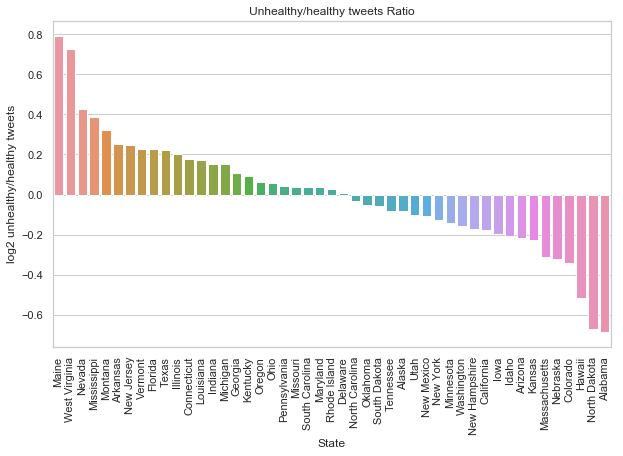

In [19]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.set(style="whitegrid")
# Sort the data by mean value
Hd16x=Hd16.reindex_axis(Hd16['unhealthy/healthy_ratio'].sort_values(ascending=False).index, axis=0)
Hd16x['log2 unhealthy/healthy tweets']=np.log2(Hd16['unhealthy/healthy_ratio'])
ax = sns.barplot(x="State", y="log2 unhealthy/healthy tweets", data=Hd16x)
plt.title('Unhealthy/healthy tweets Ratio')
plt.xticks(rotation=90)

In [11]:
# Plot Obesity rates for the year 2016
data = [ dict(
        type = 'choropleth',
        locations =  Hd16['StateCode'].str.upper(),
        z = Hd16['unhealthy/healthy_ratio'],
        text = Hd16['State'],
        locationmode = 'USA-states',
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Healthy/Unhealthy <br>Tweet Ratio'),
      ) ]

layout = dict(
    title = 'Healthy/Unhealthy Tweet Ratio',
    geo = dict(
        showframe = False,
        showcoastlines = True,
       projection = go.layout.geo.Projection(type = 'albers usa'),
    )
)

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='d3-cloropleth-map' )

## Correlation of features

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\matplotlib\legend.py:445: UserWarning:

The handle <matplotlib.patches.Patch object at 0x0000028DE39EFB00> has a label of '_nolegend_' which cannot be automatically added to the legend.



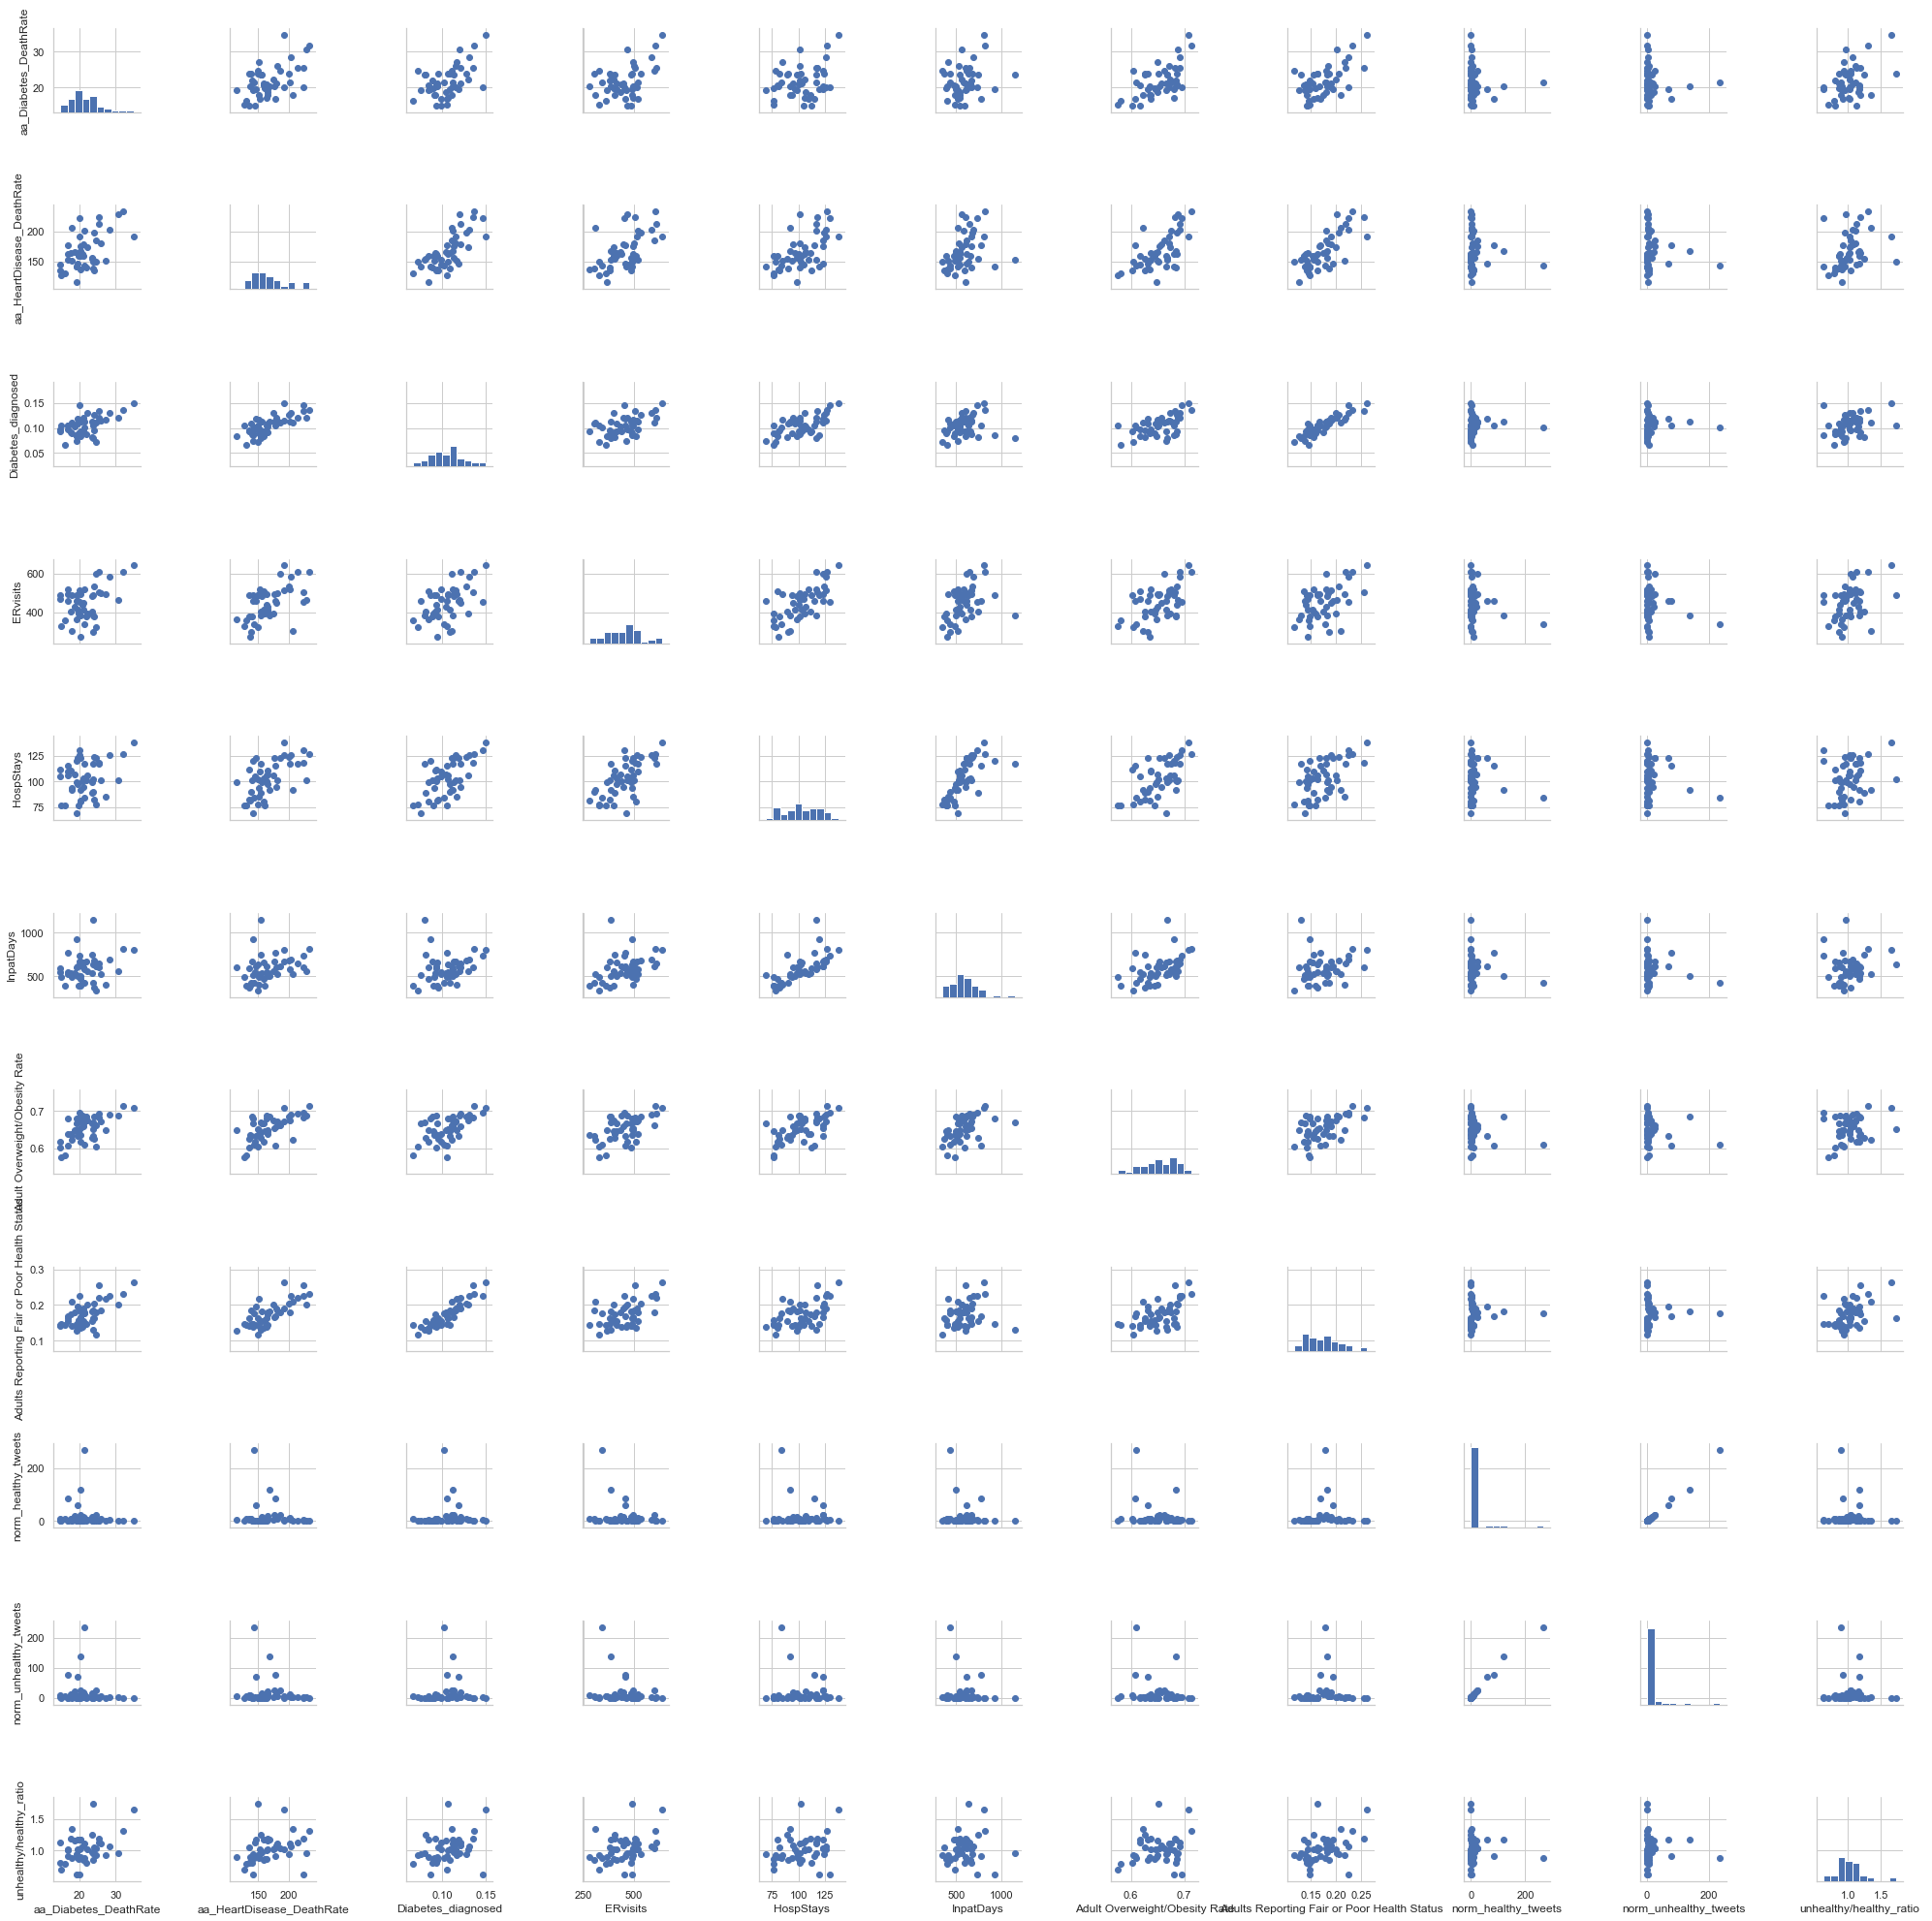

In [12]:
# Okay let's finally have a look at the data

# Let's use a bivariate comparison and look at histogram to detect outliers and at correlation between featuters
corrdat=Hd16.drop(['healthy','unhealthy','part of the total U.S. pop','Year','State','StateCode'], axis=1)
g = sns.PairGrid(corrdat)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

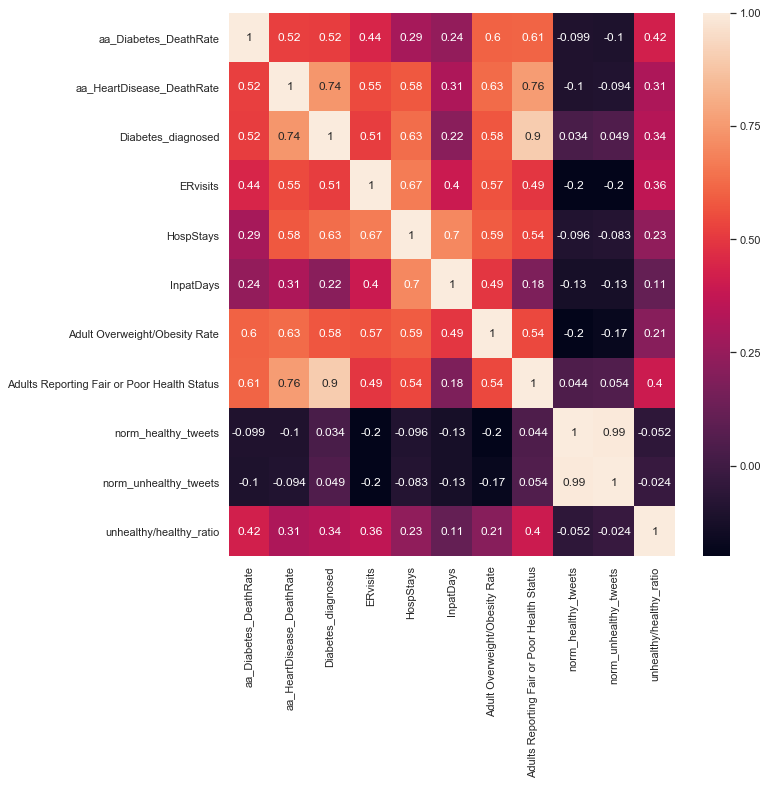

In [13]:
CorrMa = corrdat.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(CorrMa,annot=True)#[['norm_healthy_tweets','norm_unhealthy_tweets']])
plt.show()

## Result
The correlation for the unhealthy/healthy tweet ratio looks promising, this supports my hypothesis, that tweets do reflect the actual behaviour of a population.